In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats import weightstats as stests

### Uploading Bill Board data sets

In [2]:
df1 = pd.read_excel("C:/Users/Salik.Shaikh/Desktop/Salik_Py/Technocolab-internship/Predicting-Billboard-Hits-Using-Spotify-Data/ProjectDatasets/BillBoard_Features.xls")
df1.head()

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


In [3]:
# Info of columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             9328 non-null   object 
 1   Artist            9327 non-null   object 
 2   SpotifyID         9329 non-null   object 
 3   danceability      9329 non-null   float64
 4   energy            9329 non-null   float64
 5   key               9329 non-null   int64  
 6   mode              9329 non-null   int64  
 7   speechiness       9329 non-null   float64
 8   acousticness      9329 non-null   float64
 9   instrumentalness  9329 non-null   float64
 10  liveness          9329 non-null   float64
 11  valence           9329 non-null   float64
 12  tempo             9329 non-null   float64
 13  duration_ms       9329 non-null   int64  
 14  loudness          9329 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.1+ MB


#### Let's check the shape of data sets

In [4]:
df1.shape

(9329, 15)

#### Counting Null values

In [5]:
df1.isnull().sum()

Track               1
Artist              2
SpotifyID           0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
loudness            0
dtype: int64

#### Removing the null records for Track and Artist

In [6]:
df1.dropna(subset=["Track","Artist"],inplace = True)
df1.isnull().sum()

Track               0
Artist              0
SpotifyID           0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
loudness            0
dtype: int64

#### Now we will remove duplicate values from SpotifyID

In [7]:
df1.drop_duplicates(subset = "SpotifyID",keep = False,inplace = True)
df1.head()

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


In [8]:
df1.shape

(9256, 15)

### Uploading Million set data excel file

In [9]:
df2 = pd.read_excel("C:\\Users\\Salik.Shaikh\\Desktop\\Salik_Py\\Technocolab-internship\\Predicting-Billboard-Hits-Using-Spotify-Data\\ProjectDatasets\\MSD_Features.xls")
df2.head()

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560


In [10]:
df2.columns

Index([                 0,                  1,                  2,
                        3,                  4,                  5,
           'danceability',           'energy',              'key',
               'loudness',             'mode',      'speechiness',
           'acousticness', 'instrumentalness',         'liveness',
                'valence',            'tempo',      'duration_ms'],
      dtype='object')

#### Check the shape of the MSD data

In [11]:
df2.shape

(5603, 18)

#### Renaming columns with correct label

In [12]:
df2.rename(columns = {0:"Artist",1:"Album",2:"Track",3:"Year",4:"MSD ID",5:"SpotifyID"}, inplace = True)
df2.head()

,Artist,Album,Track,Year,MSD ID,SpotifyID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560


#### Check for null values

In [13]:
df2.isnull().sum()

Artist              0
Album               0
Track               0
Year                0
MSD ID              0
SpotifyID           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

#### Now we will drop columns Album,Year and MSD ID

In [14]:
df2.drop(columns=["Album","Year","MSD ID"],axis=1,inplace=True)
df2.shape

(5603, 15)

#### Now we will drop duplicates values in MSD data sets also based on Spotify ID

In [15]:
df2.drop_duplicates(subset="SpotifyID",keep=False,inplace=True)
df2.shape

(5522, 15)

#### Checking shape of both the data sets

In [16]:
df1.shape,df2.shape

((9256, 15), (5522, 15))

#### Now we will extract all the unique Spotify ID's that are present in BillBoard data sets i.e. hit

In [17]:
SpotifyID_hit = list(df1["SpotifyID"].unique())
len(SpotifyID_hit)

9256

#### Now we will extract all those SpotifyID's which are not present in BillBoard Hit data set that means they are not hit.

In [18]:
SpotifyID_Non_Hit = df2[~df2["SpotifyID"].isin(df1["SpotifyID"])]
SpotifyID_Non_Hit.shape

(5424, 15)

In [19]:
df1.columns,SpotifyID_Non_Hit.columns

(Index(['Track', 'Artist', 'SpotifyID', 'danceability', 'energy', 'key', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'loudness'],
       dtype='object'),
 Index(['Artist', 'Track', 'SpotifyID', 'danceability', 'energy', 'key',
        'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'duration_ms'],
       dtype='object'))

#### Let's keep the column sequence same throughout so we will rearrange MSD data set i.e. Non Hit

In [20]:
SpotifyID_Non_Hit = SpotifyID_Non_Hit[['Track', 'Artist', 'SpotifyID', 'danceability', 'energy', 'key', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'loudness']]

#### Now sequence of columns are same throughout

In [21]:
df1.columns,SpotifyID_Non_Hit.columns

(Index(['Track', 'Artist', 'SpotifyID', 'danceability', 'energy', 'key', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'loudness'],
       dtype='object'),
 Index(['Track', 'Artist', 'SpotifyID', 'danceability', 'energy', 'key', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'loudness'],
       dtype='object'))

### Adding new column in both the data file as Hit and Non Hit
#### In df1 data set, we will punch as 1 because it has all Hit data
#### In SpotifyID_Non_Hit data set, we will punch as 0 because it has all Non Hit data

In [22]:
df1["Hit"] = 1
SpotifyID_Non_Hit["Hit"] = 0

#### let's just check if it is added in the column or not

In [23]:
df1.columns,SpotifyID_Non_Hit.columns

(Index(['Track', 'Artist', 'SpotifyID', 'danceability', 'energy', 'key', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'loudness', 'Hit'],
       dtype='object'),
 Index(['Track', 'Artist', 'SpotifyID', 'danceability', 'energy', 'key', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'loudness', 'Hit'],
       dtype='object'))

In [24]:
df1.head(2)

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,Hit
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.20,0.349,0.0,0.340,0.218,83.903,239836,-7.230,1
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.04,0.331,0.0,0.135,0.341,145.038,231267,-5.804,1


In [25]:
SpotifyID_Non_Hit.head(2)

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,Hit
0,Amor De Cabaret,Sonora Santanera,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,-6.422,0
1,Young Boy Blues,JennyAnyKind,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,-9.159,0


### Let's merge both the data files

In [26]:
df_merge = pd.concat([df1,SpotifyID_Non_Hit])
df_merge.shape

(14680, 16)

#### Let's drop duplicate Spotify ID's

In [27]:
df_merge.drop_duplicates(subset="SpotifyID",keep=False,inplace = True)

In [28]:
df_merge.shape

(14680, 16)

#### Now this is the data we can use for further data processing

In [29]:
df_merge.head()

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,Hit
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230,1
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804,1
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903,1
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714,1
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114,1


In [30]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 5602
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             14680 non-null  object 
 1   Artist            14680 non-null  object 
 2   SpotifyID         14680 non-null  object 
 3   danceability      14680 non-null  float64
 4   energy            14680 non-null  float64
 5   key               14680 non-null  int64  
 6   mode              14680 non-null  int64  
 7   speechiness       14680 non-null  float64
 8   acousticness      14680 non-null  float64
 9   instrumentalness  14680 non-null  float64
 10  liveness          14680 non-null  float64
 11  valence           14680 non-null  float64
 12  tempo             14680 non-null  float64
 13  duration_ms       14680 non-null  int64  
 14  loudness          14680 non-null  float64
 15  Hit               14680 non-null  int64  
dtypes: float64(9), int64(4), object(3)
memory

#### Let's keep spotify id as index, being unique from all

In [31]:
df_merge.set_index("SpotifyID",inplace = True)

In [32]:
df_merge.head()

,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,Hit
SpotifyID,,,,,,,,,,,,,,,
285pBltuF7vW8TeWk8hdRR,Lucid Dreams,Juice WRLD,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230,1
7dt6x5M1jzdTEt8oCbisTK,Better Now,Post Malone,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804,1
78QR3Wp35dqAhFEc2qAGjE,Drip Too Hard,Lil Baby & Gunna,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903,1
2xLMifQCjDGFmkHkpNLD9h,Sicko Mode,Travis Scott,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714,1
2iUXsYOEPhVqEBwsqP70rE,Youngblood,5 Seconds Of Summer,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114,1


#### Outliers treatments

In [33]:
df_merge_num = df_merge.select_dtypes(include=np.number)

#### Find absolute of z-score value for each observation

In [34]:
z = np.abs(stats.zscore(df_merge_num))

#### As per standard only keeping z-score values that is less than 3

In [35]:
df_cleaned = df_merge_num[(z<3).all(axis=1)]

In [36]:
df_cleaned.shape

(14530, 13)

#### Let's check how many rows are removed after outlier operations

In [37]:
# So there are 150 rows have been removed
df_merge.shape[0] - df_cleaned.shape[0]

150

#### Saving free outliers data frame in df_merge variable

In [38]:
df_merge = df_merge[df_merge.index.isin(df_cleaned.index)]

In [39]:
df_merge.to_csv("Cleaned_BB_MSD.csv")

#### Let's check the count of 1 and 0 using normalize method i.e. dividing the count of 1 by 2 similarly dividinh the count of 0 by 2

In [40]:
# Hit:NonHit ratio is 63:37
df_merge["Hit"].value_counts(normalize=True).to_frame()

,Hit
1,0.634893
0,0.365107


<AxesSubplot:>

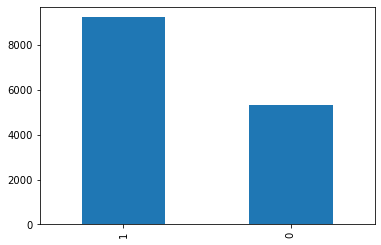

In [41]:
df_merge["Hit"].value_counts().plot(kind="bar")

#### Now let's find top 10 energetic songs

In [42]:
# df_merge["energy"].sort_values(ascending=False).head(10).to_frame()
Top10_energetic =df_merge.sort_values(by="energy",ascending=False).head(10)
Top10_energetic

,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,Hit
SpotifyID,,,,,,,,,,,,,,,
1iT9oqeZGYOnspkV4AiIoJ,Popcorn,Richi M.,0.816,1.000,7,0,0.0644,0.030000,0.852000,0.3600,0.5420,137.974,214867,-5.739,0
3HEJpfNiNs7wsUxpMh9n0X,Burning In The Aftermath,The Suicide Machines,0.464,0.999,2,1,0.1560,0.001380,0.000000,0.2850,0.1480,115.807,95853,-2.242,0
608wNyUrCxorcPh4miyKAq,Communication,Mario Piu,0.662,0.999,4,0,0.0982,0.044700,0.812000,0.0949,0.5210,137.996,160107,-6.518,0
3TPcpHQ0LWUdP7x2ZIQCzZ,Sanctuary,Sick Of It All,0.337,0.999,10,1,0.1910,0.000004,0.000247,0.1150,0.3440,96.107,114573,-2.622,0
5N1HE12rj0d82cGOJrzSpl,the fallen...,Set Your Goals,0.268,0.998,8,1,0.3880,0.006200,0.000017,0.1080,0.2270,194.655,204413,-1.522,0
6gk9ivrRwjZrv6MQhf5fw8,Babylon,Judas Iscariot,0.135,0.998,2,1,0.0754,0.149000,0.428000,0.3790,0.0246,79.678,393840,-7.455,0
56poKFI5j8kzPDO2M4BQHR,Dog Tagged,Kill The Client,0.157,0.998,7,1,0.2230,0.000002,0.949000,0.1860,0.0395,133.864,57168,-2.671,0
3fN36bwAZW7bQY5Voqd8Im,Bad,Tomash Gee,0.496,0.998,1,1,0.0878,0.001010,0.939000,0.6270,0.2500,147.002,374309,-4.411,0
5KbyTMn0b4JhsfELSFP8EB,Many Are We,Keep Of Kalessin,0.374,0.997,3,1,0.2020,0.000870,0.805000,0.2550,0.0360,109.883,292427,-5.078,0


<AxesSubplot:xlabel='energy', ylabel='Track'>

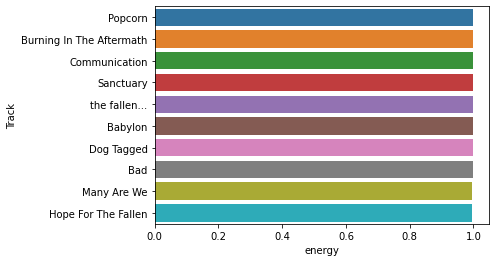

In [43]:
sns.barplot(x="energy",y="Track",data=Top10_energetic)

#### Top 10 danceable songs

In [44]:
Top10_dance =df_merge.sort_values(by="danceability",ascending=False).head(10)
Top10_dance

,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,Hit
SpotifyID,,,,,,,,,,,,,,,
1MgM0WDaoQ2A3bnIQTR6ty,Go Girl,Pitbull Featuring Trina & Young Bo$$,0.986,0.597,8,1,0.3080,0.14500,0.000002,0.1970,0.761,115.004,229669,-6.809,1
7n0ShZeoewT4ZOJCmwHdnQ,Sentimental Man,Winston Reedy,0.984,0.395,11,1,0.0653,0.02360,0.000084,0.0654,0.922,118.089,196200,-11.838,0
1r6cyaW7yMykwSyxTuwcuM,Cash Me Outside (#CashMeOutside),DJ Suede The Remix God,0.981,0.417,11,0,0.1340,0.04710,0.359000,0.1030,0.262,122.044,129384,-10.732,1
3kUkjtNjWG7jFEMIEPnVJq,Ice Ice Baby,Glee Cast,0.980,0.816,7,1,0.0831,0.01920,0.002980,0.0554,0.787,120.019,205120,-8.087,1
3XVozq1aeqsJwpXrEZrDJ9,Ice Ice Baby,Vanilla Ice,0.979,0.792,2,1,0.0388,0.00250,0.000008,0.1020,0.583,116.012,254467,-2.784,1
0wbDgMuAoy7O7pL3a69uZx,Give It To Me,Timbaland Featuring Nelly Furtado & Justin Tim...,0.975,0.711,8,1,0.0632,0.16800,0.000552,0.0799,0.815,110.621,234027,-3.904,1
4TJ56OkWrnf2fv2a6T69DL,In Da Wind,Trick Daddy Featuring Cee-Lo & Big Boi,0.974,0.586,0,1,0.1800,0.12000,0.000000,0.0585,0.689,113.998,260480,-3.801,1
2jIT1TfSIjVik7Qu1B6P5h,Make Love,Gucci Mane & Nicki Minaj,0.972,0.563,11,1,0.1560,0.00528,0.002570,0.1110,0.217,129.984,300160,-6.983,1
7eH6rFngQor2A08suABvGI,Be True To Yourself,2nd II None,0.971,0.578,6,0,0.1870,0.00297,0.000000,0.3680,0.631,113.009,164960,-14.512,1


<AxesSubplot:xlabel='danceability', ylabel='Track'>

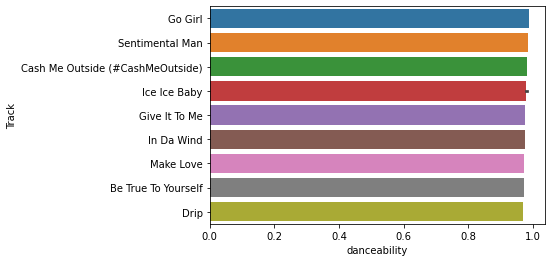

In [45]:
sns.barplot(x="danceability",y="Track",data=Top10_dance)

#### There are total 11 keys in the key column let's find out counts of different keys

<AxesSubplot:xlabel='key', ylabel='count'>

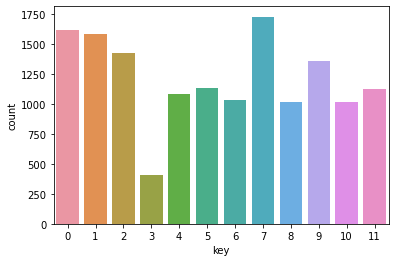

In [46]:
sns.countplot(df_merge["key"])

#### Let's check the proportion of Mode

In [47]:
# The ratio of 1:0 is 67:32
df_merge["mode"].value_counts(normalize = True).to_frame()

,mode
1,0.675155
0,0.324845


<AxesSubplot:>

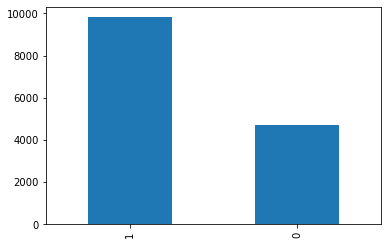

In [48]:
df_merge["mode"].value_counts().plot(kind="bar")

#### Let's check the duration_ms column

#### Data is in miliseconds, let's convert it into minutes by dividing it into 60000

In [49]:
df_merge["duration_min"] = round(df_merge["duration_ms"]/60000,2)

In [50]:
Avg_duration = df_merge["duration_min"].mean()

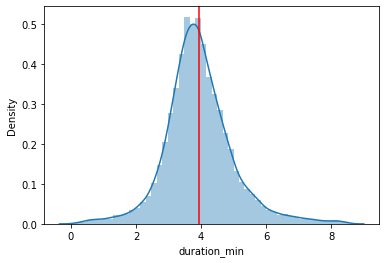

In [51]:
sns.distplot(df_merge["duration_min"])
plt.axvline(Avg_duration,label="mean",color="r")

#### Let's perform operation in tempo column

In [52]:
avg_tempo = df_merge["tempo"].mean()
print("Average of tempo is", round(avg_tempo,2) )

Average of tempo is 120.67


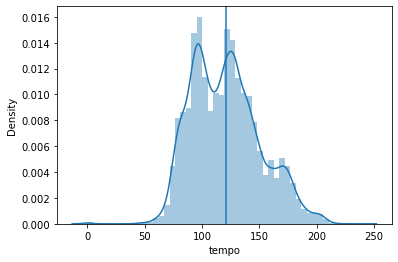

In [53]:
sns.distplot(df_merge["tempo"])
plt.axvline(avg_tempo, label="mean")

#### Relationship plots (3D scatter plots)

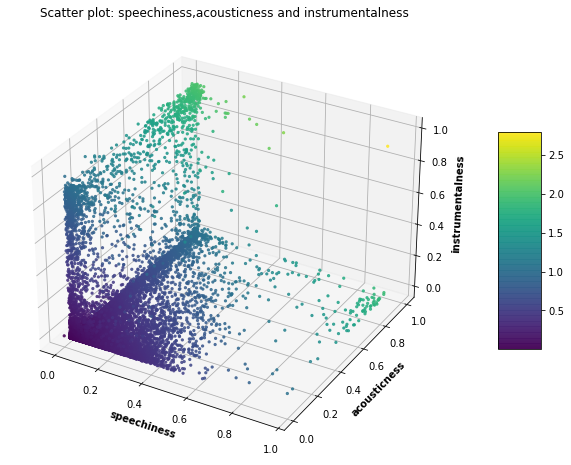

In [54]:
x = df_merge['speechiness']
y = df_merge['acousticness']
z = df_merge['instrumentalness']
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
sctt = ax.scatter3D(x, y, z,
 alpha = 0.8,
 c = (x + y + z),
 marker ='.')
plt.title("Scatter plot: speechiness,acousticness and instrumentalness")
ax.set_xlabel('speechiness', fontweight ='bold')
ax.set_ylabel('acousticness', fontweight ='bold')
ax.set_zlabel('instrumentalness', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

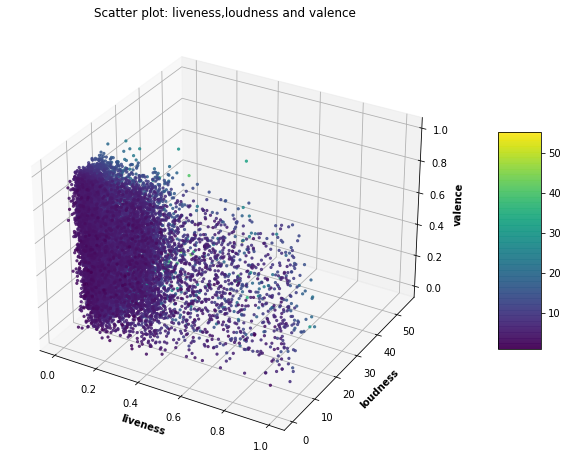

In [55]:
x = df_merge['liveness']
y = df_merge['loudness'].abs()
z = df_merge['valence']
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
sctt = ax.scatter3D(x, y, z,
 alpha = 0.8,
 c = (x + y + z),
 marker ='.')
plt.title("Scatter plot: liveness,loudness and valence")
ax.set_xlabel('liveness', fontweight ='bold')
ax.set_ylabel('loudness', fontweight ='bold')
ax.set_zlabel('valence', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

#### Relationship plots (2D scatter plots)

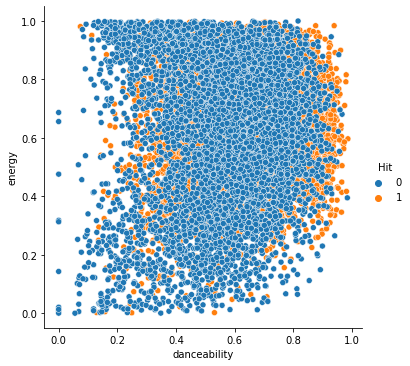

In [56]:
 sns.relplot(df_merge['danceability'],df_merge['energy'],hue=df_merge['Hit'])

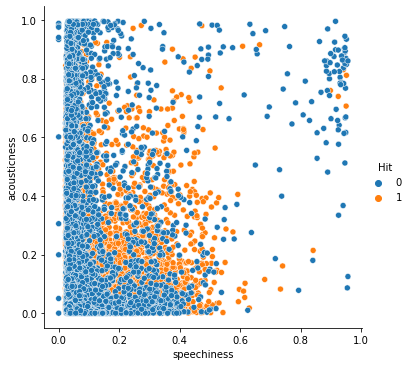

In [57]:
sns.relplot(df_merge['speechiness'],df_merge['acousticness'],hue=df_merge['Hit'])

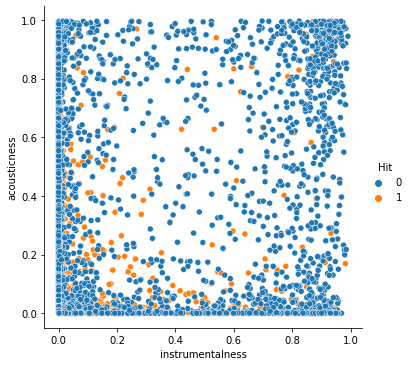

In [58]:
sns.relplot(df_merge['instrumentalness'],df_merge['acousticness'],hue=df_merge['Hit'])

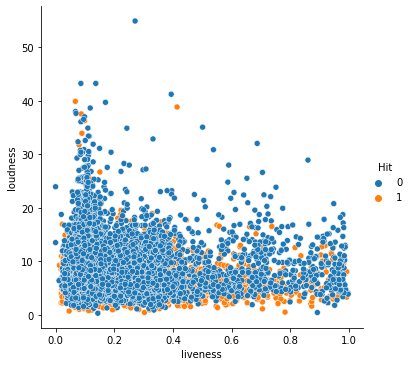

In [59]:
sns.relplot(df_merge['liveness'],df_merge['loudness'].abs(),hue=df_merge['Hit'])

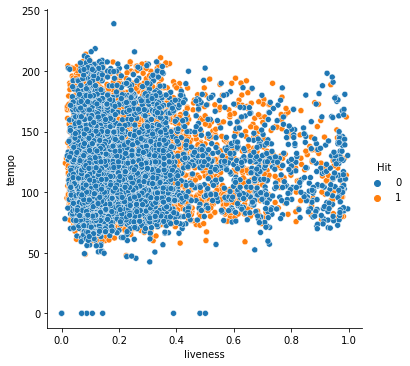

In [60]:
sns.relplot(df_merge['liveness'],df_merge['tempo'].abs(),hue=df_merge['Hit'])

#### Correlation heat map

<AxesSubplot:>

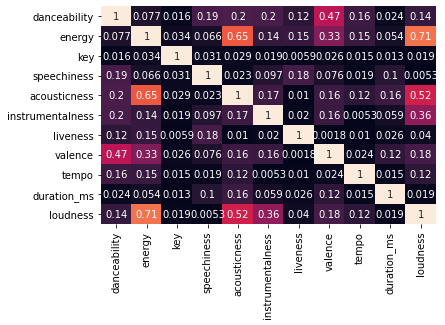

In [61]:
df_number = df_merge.select_dtypes(include=np.number).drop(["mode","Hit","duration_min"],axis=1)
sns.heatmap(df_number.corr().abs(),annot=True,cbar=False)

#### acousticness and energy , loudness and energy are the only pair of features which are having significant correlation among them.

#### let's revisit these relations.

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

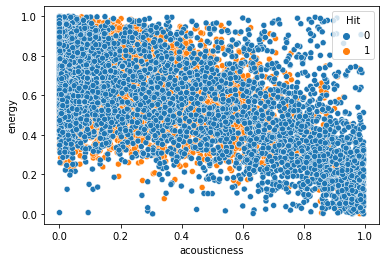

In [62]:
sns.scatterplot(df_merge['acousticness'],df_merge['energy'],hue=df_merge['Hit'])

<AxesSubplot:xlabel='loudness', ylabel='energy'>

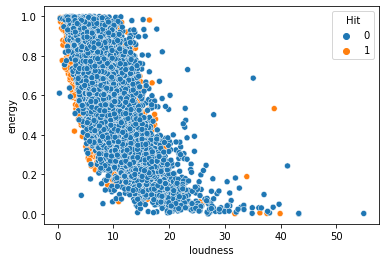

In [63]:
sns.scatterplot(df_merge['loudness'].abs(),df_merge['energy'],hue=df_merge['Hit'])

### Hypothesis tests to check the dependency of numerical features and categorical features on target variable.
#### H0: features are not-dependent with target variable.
#### Ha: features are dependent with target variable.
#### Consideration:
#### Confidence Interval: 95% (significance level : 5% )
#### Numerical features : 2-sample z-test
#### categorical features : chi-square test of independence

In [64]:
G1 = df_merge[df_merge["Hit"]==0]["danceability"]
G2 = df_merge[df_merge["Hit"]==1]["danceability"]

In [65]:
stests.ztest(G1,G2)

(-30.373161234802133, 1.2427110394541302e-202)

In [66]:
stests.ztest(G1,G2)[1]

1.2427110394541302e-202

In [67]:
df_merge_num = df_merge_num.drop(["key","mode","Hit"],axis=1)
df_merge_num

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
SpotifyID,,,,,,,,,,
285pBltuF7vW8TeWk8hdRR,0.511,0.566,0.2000,0.349000,0.000000,0.3400,0.2180,83.903,239836,-7.230
7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,0.0400,0.331000,0.000000,0.1350,0.3410,145.038,231267,-5.804
78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,0.2920,0.085200,0.000000,0.5340,0.3890,112.511,145543,-6.903
2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,312820,-3.714
2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,0.4630,0.016900,0.000000,0.1240,0.1520,120.274,203418,-5.114
...,...,...,...,...,...,...,...,...,...,...
7xV2k7FEMtUT4IUu4L87it,0.562,0.525,0.0283,0.456000,0.883000,0.3110,0.7130,141.957,314533,-14.594
3e0tyTV5FiV1bcYeRjdDz2,0.404,0.636,0.0325,0.064300,0.653000,0.0795,0.0979,140.105,386333,-8.798
2CQwzG5nbS7ys8CHSlavVg,0.406,0.895,0.0563,0.000429,0.000032,0.1200,0.2780,150.326,209693,-5.282


In [68]:
p_values_list=[]
for col in df_merge_num.columns:
    G1 = df_merge[df_merge['Hit']==0][col]
    G2 = df_merge[df_merge['Hit']==1][col]
    p_value = stests.ztest(G1,G2)[1]
    p_values_list.append(p_value)

dependency_list=['dependent' if p<0.05 else 'not-dependent' for p in p_values_list ]
pd.DataFrame({'Feature':df_merge_num.columns, 'P-values':p_values_list,'Dependency with target':dependency_list})

,Feature,P-values,Dependency with target
0,danceability,1.242711e-202,dependent
1,energy,1.002509e-102,dependent
2,speechiness,8.908876e-01,not-dependent
3,acousticness,3.256461e-304,dependent
4,instrumentalness,0.000000e+00,dependent
5,liveness,1.469094e-31,dependent
6,valence,4.847784e-02,dependent
7,tempo,3.855218e-02,dependent
8,duration_ms,1.100337e-17,dependent
9,loudness,0.000000e+00,dependent


#### Let's check categorical columns i.e. Mode and Key

In [69]:
df_merge_cat = df_merge[["key","mode"]]

In [70]:
p_vals=[]
for col in df_merge_cat.columns:
    dfNew = pd.crosstab(df_merge['Hit'],df_merge[col])
    p_val = stats.chi2_contingency(dfNew)[1]
    p_vals.append(p_val)
dependency_list_cat=['dependent' if p<0.05 else 'not-dependent' for p in p_vals ]
pd.DataFrame({'Feature':df_merge_cat.columns, 'P-values':p_vals,'Dependency with target':dependency_list_cat})

,Feature,P-values,Dependency with target
0,key,3.708598e-33,dependent
1,mode,1.135764e-02,dependent


#### From the above hypothesis test with 95% Confidence Interval we can clearly see that apart from speechiness all are significant predictors of target variable.

#### Multicollinearity check : energy column is having highest VIF factor but not significantly large to be dropped.

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_merge.drop(['Track','Artist','Hit',"duration_min"],axis=1)
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
 
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,Feature,VIF
1,energy,19.171371
0,danceability,16.374929
9,tempo,15.011448
10,duration_ms,14.263656
8,valence,8.691957
11,loudness,8.142193
2,key,3.209195
3,mode,3.111841
5,acousticness,2.622257
7,liveness,2.586114


<AxesSubplot:xlabel='Feature', ylabel='VIF'>

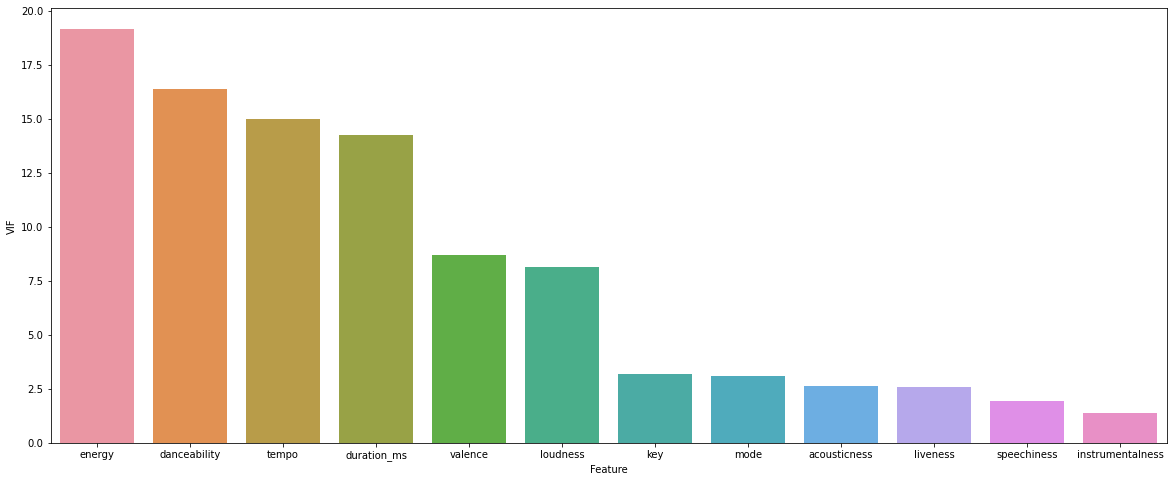

In [72]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature',y='VIF',data=vif_data)

#### From above result we can see that apart from speechiness all are significant predictor of target variable

# Conclusion :
##### We used two main data sets that is BillBoard and MSD data set.
##### We analyzed both the data sets and did some basic EDA on that, we created new variable as "Hit" and give punch as 1 and 0 as per BillBoard hit, and merged them.
##### After that we performed outliers check, and we calculated the z-test for each observation.
##### We performed visualization on different cases.
##### We found that 'speechiness' column is not a good predictor and we can drop that.

## Machine Learning model (SVM)

In [73]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [74]:
# Uploading file
df_final = pd.read_csv("C:\\Users\\Salik.Shaikh\\Desktop\\Salik_Py\\Technocolab-internship\\Predicting-Billboard-Hits-Using-Spotify-Data\\ProjectDatasets\\final_data.csv")
df_final

,Artist,Track,SpotifyID,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Key_mode_Ratio,duration_ms,billboard_hit
0,Sonora Santanera,Amor De Cabaret,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,-6.422,0.0290,0.689000,0.000471,0.9350,0.676,102.463,8.0,183027,0
1,JennyAnyKind,Young Boy Blues,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,-9.159,0.0495,0.000055,0.000768,0.0988,0.203,146.609,0.0,218907,0
2,Casual,I Didn't Mean To,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,-10.508,0.4290,0.063000,0.000025,0.1060,0.553,92.224,0.0,218933,0
3,Jeff And Sheri Easter,The Moon And I (Ordinary Day Album Version),7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,-8.328,0.0325,0.706000,0.000005,0.0833,0.286,147.565,5.0,267640,0
4,Tweeterfriendly Music,Drop of Rain,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,-10.716,0.0352,0.553000,0.000116,0.0963,0.185,100.315,7.0,189560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,The 2 Live Crew,Me So Horny,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,-11.157,0.0986,0.003360,0.000500,0.0833,0.949,132.737,1.0,260441,1
14633,Technotronic Featuring Felly,Pump Up The Jam,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,-7.375,0.1150,0.023900,0.000000,0.0491,0.675,124.810,0.0,215040,1
14634,Mantronix Featuring Wondress,Got To Have Your Love,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,-13.669,0.0753,0.179000,0.001070,0.0497,0.960,105.632,0.0,383333,1
14635,Entouch Featuring Keith Sweat,All Nite,6q989QMsV87X9Em9J6DONi,0.834,0.485,-13.040,0.0453,0.047800,0.000051,0.1030,0.929,107.598,11.0,368467,1


In [75]:
df_0 = df_final[df_final.billboard_hit==0]
df_1 = df_final[df_final.billboard_hit==1]

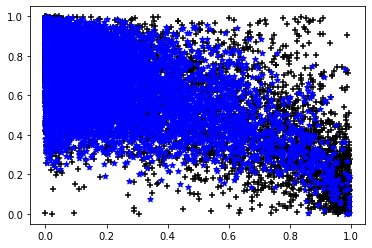

In [76]:
plt.scatter(df_0["acousticness"],df_0["energy"],color="black",marker="+")
plt.scatter(df_1["acousticness"],df_1["energy"],color="blue",marker="*")

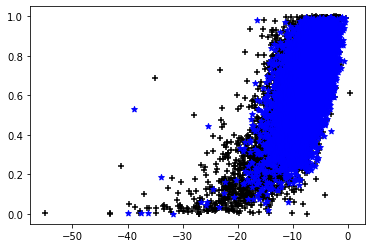

In [77]:
plt.scatter(df_0["loudness"],df_0["energy"],color="black",marker="+")
plt.scatter(df_1["loudness"],df_1["energy"],color="blue",marker="*")

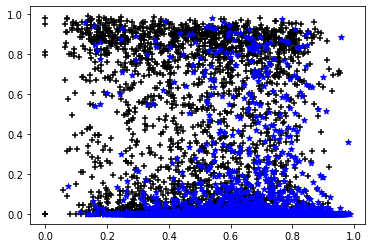

In [78]:
plt.scatter(df_0["danceability"],df_0["instrumentalness"],color="black",marker="+")
plt.scatter(df_1["danceability"],df_1["instrumentalness"],color="blue",marker="*")

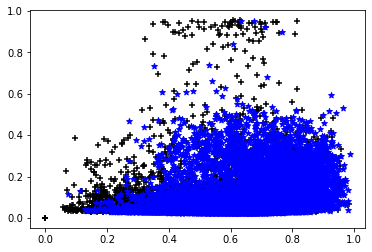

In [79]:
plt.scatter(df_0["danceability"],df_0["speechiness"],color="black",marker="+")
plt.scatter(df_1["danceability"],df_1["speechiness"],color="blue",marker="*")

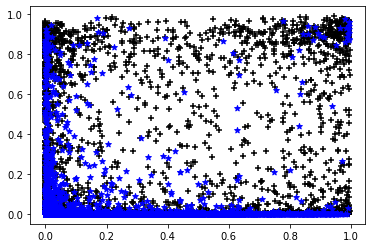

In [80]:
plt.scatter(df_0["acousticness"],df_0["instrumentalness"],color="black",marker="+")
plt.scatter(df_1["acousticness"],df_1["instrumentalness"],color="blue",marker="*")

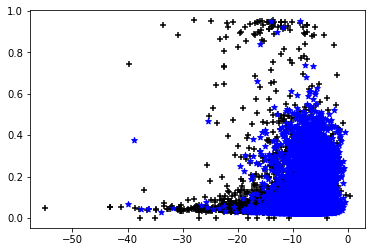

In [81]:
plt.scatter(df_0["loudness"],df_0["speechiness"],color="black",marker="+")
plt.scatter(df_1["loudness"],df_1["speechiness"],color="blue",marker="*")

In [82]:
# Removing other colums
df_final_X = df_final.drop(["Artist","Track","SpotifyID","billboard_hit"],axis=1)
df_final_X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Key_mode_Ratio,duration_ms
0,0.699,0.519,-6.422,0.0290,0.689000,0.000471,0.9350,0.676,102.463,8.0,183027
1,0.458,0.570,-9.159,0.0495,0.000055,0.000768,0.0988,0.203,146.609,0.0,218907
2,0.751,0.549,-10.508,0.4290,0.063000,0.000025,0.1060,0.553,92.224,0.0,218933
3,0.456,0.472,-8.328,0.0325,0.706000,0.000005,0.0833,0.286,147.565,5.0,267640
4,0.498,0.300,-10.716,0.0352,0.553000,0.000116,0.0963,0.185,100.315,7.0,189560
...,...,...,...,...,...,...,...,...,...,...,...
14632,0.893,0.523,-11.157,0.0986,0.003360,0.000500,0.0833,0.949,132.737,1.0,260441
14633,0.867,0.911,-7.375,0.1150,0.023900,0.000000,0.0491,0.675,124.810,0.0,215040
14634,0.763,0.505,-13.669,0.0753,0.179000,0.001070,0.0497,0.960,105.632,0.0,383333
14635,0.834,0.485,-13.040,0.0453,0.047800,0.000051,0.1030,0.929,107.598,11.0,368467


In [83]:
# BillBoard Hit is our main feature
df_final_Y = df_final["billboard_hit"]
df_final_Y

0        0
1        0
2        0
3        0
4        0
        ..
14632    1
14633    1
14634    1
14635    1
14636    1
Name: billboard_hit, Length: 14637, dtype: int64

In [84]:
# Splitting data set into both training and testing
X_train, X_test, y_train, y_test = train_test_split(df_final_X,df_final_Y,test_size = 0.25,random_state=0)

In [85]:
# Check the length of training and testing data
len(X_train),len(X_test)

(10977, 3660)

In [86]:
# Create a SVM classifier
model = svm.SVC()

In [87]:
# Train the model using training sets
model.fit(X_train,y_train)

SVC()

In [88]:
pred = model.predict(X_test)

In [89]:
model.score(X_test,y_test)

0.6975409836065574

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [91]:
lin_clf = LinearSVC(random_state=0)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
print("Training Accuracy",round(accuracy_score(y_train, y_pred),2)*100,"%")

Training Accuracy 77.0 %


In [92]:
svm_clf = SVC(gamma="scale",C=180)
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_train_scaled)
print("Training Accuracy",round(accuracy_score(y_train, y_pred),2)*100,"%")

Training Accuracy 88.0 %


In [93]:
# classifier = SVC(kernel='linear', random_state=0)  
# classifier.fit(X_train_scaled, y_train)
# y_pred= classifier.predict(X_test_scaled) 